In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

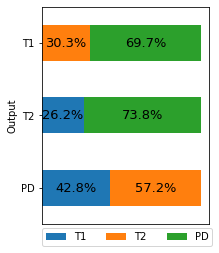

In [2]:
df = pd.read_excel("attn_ixi.xlsx")
df.plot(
    x = 'Output',
    y = ['T1', 'T2', 'PD'],
    kind = 'barh',
    stacked = True,
    #title = 'IXI',
    mark_right = True,
    figsize=(3, 4))

df_total = df["T1"] + df["T2"] + df["PD"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        if pc > 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                     va = 'center', ha = 'center',fontsize=13)
legend_outside = plt.legend(loc=(0, -0.1), ncol=len(df.columns))
plt.gca().invert_yaxis()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig("attn_ixi.pdf",bbox_extra_artists=(legend_outside,), 
            bbox_inches='tight')

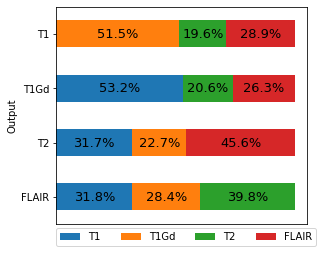

In [3]:
df = pd.read_excel("attn_brats.xlsx")
df.plot(
    x = 'Output',
    y = ['T1', 'T1Gd', 'T2', 'FLAIR'],
    kind = 'barh',
    stacked = True,
    #title = 'BraTS', #percentage of attention scores
    mark_right = True,
    figsize=(4.5, 4))
legend_outside = plt.legend(loc=(0, -0.1), ncol=len(df.columns))
df_total = df["T1"] + df["T1Gd"] + df["T2"] + df["FLAIR"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        if pc > 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                     va = 'center', ha = 'center', fontsize=13)
plt.gca().invert_yaxis()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig("attn_brats.pdf",bbox_extra_artists=(legend_outside,), 
            bbox_inches='tight')